##Import Modules

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess -p /content/datasets/


100% 426M/428M [00:19<00:00, 24.7MB/s]
100% 428M/428M [00:19<00:00, 22.5MB/s]


In [ ]:
!unzip /content/datasets/toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS Toronto emotional 

##Load The Data

In [ ]:
paths = []
labels = []
for dirname, _, filename in os.walk("/content/TESS Toronto emotional speech set data"):
  for filename in filename:
    paths.append(os.path.join(dirname,filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
print("Dataset is Loaded")

Dataset is Loaded


In [ ]:
paths[:5]

['/content/TESS Toronto emotional speech set data/YAF_happy/YAF_team_happy.wav',
 '/content/TESS Toronto emotional speech set data/YAF_happy/YAF_numb_happy.wav',
 '/content/TESS Toronto emotional speech set data/YAF_happy/YAF_hole_happy.wav',
 '/content/TESS Toronto emotional speech set data/YAF_happy/YAF_jar_happy.wav',
 '/content/TESS Toronto emotional speech set data/YAF_happy/YAF_rush_happy.wav']

In [ ]:
labels

['happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',


In [ ]:
## Create a Dataframe
df = pd.DataFrame()
df['Speech'] = paths
df['label'] = labels
df.head()

,Speech,label
0,/content/TESS Toronto emotional speech set dat...,happy
1,/content/TESS Toronto emotional speech set dat...,happy
2,/content/TESS Toronto emotional speech set dat...,happy
3,/content/TESS Toronto emotional speech set dat...,happy
4,/content/TESS Toronto emotional speech set dat...,happy


In [ ]:
df['label'].value_counts()

happy      400
angry      400
sad        400
fear       400
neutral    400
ps         400
disgust    400
Name: label, dtype: int64

## Exploratory Data Analysis

In [ ]:
print(df['label'].unique())

['happy' 'angry' 'sad' 'fear' 'neutral' 'ps' 'disgust']


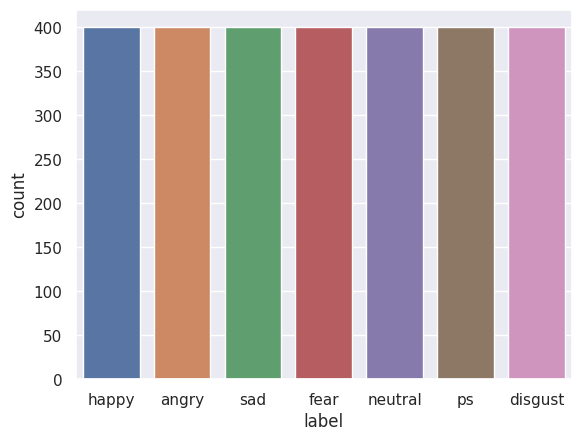

In [ ]:
sns.set()  # Reset the default Seaborn settings and color palette
sns.countplot(data=df, x='label')
plt.show()

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

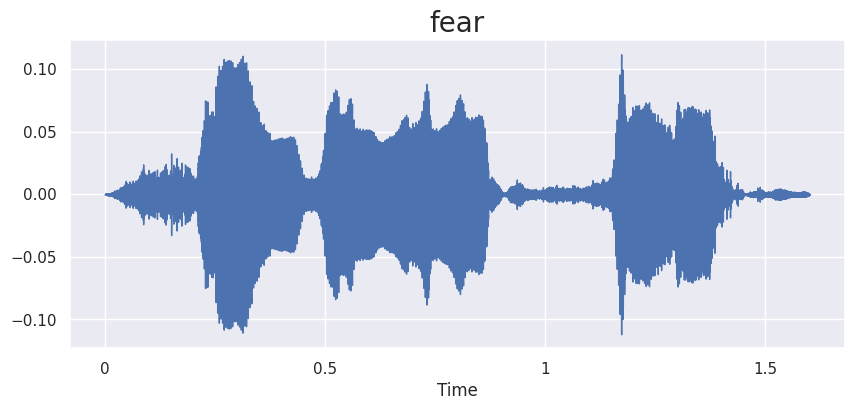

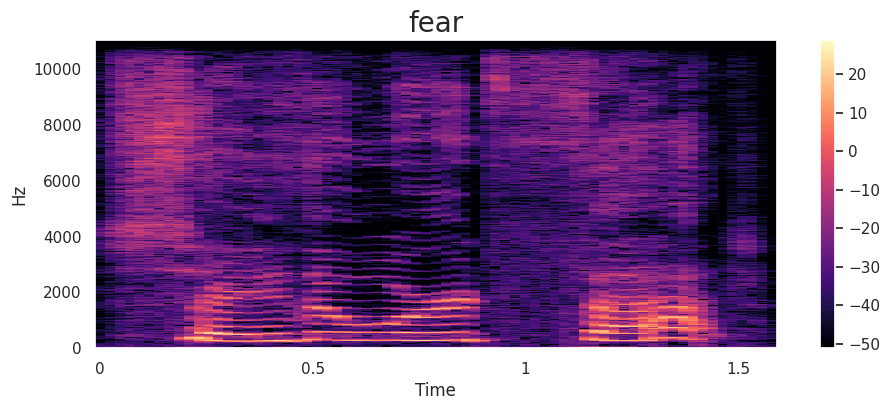

In [ ]:
emotion = 'fear'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

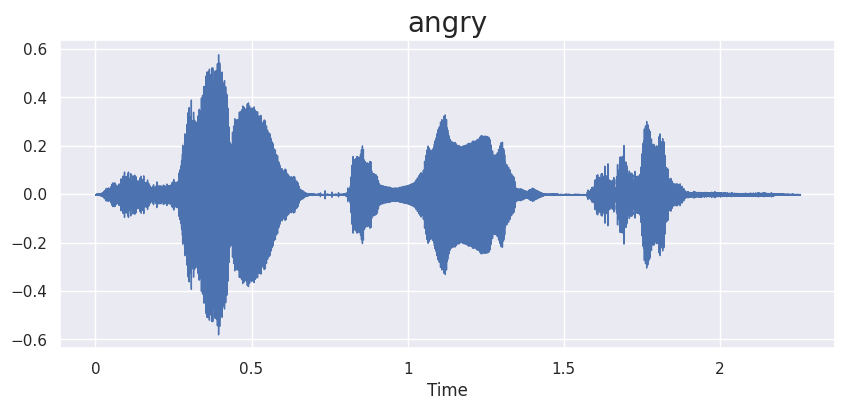

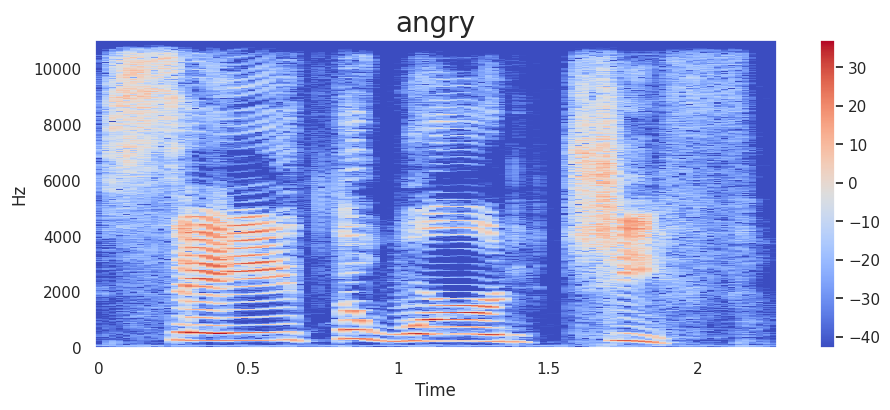

In [ ]:
emotion = 'angry'
path = np.array(df['Speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

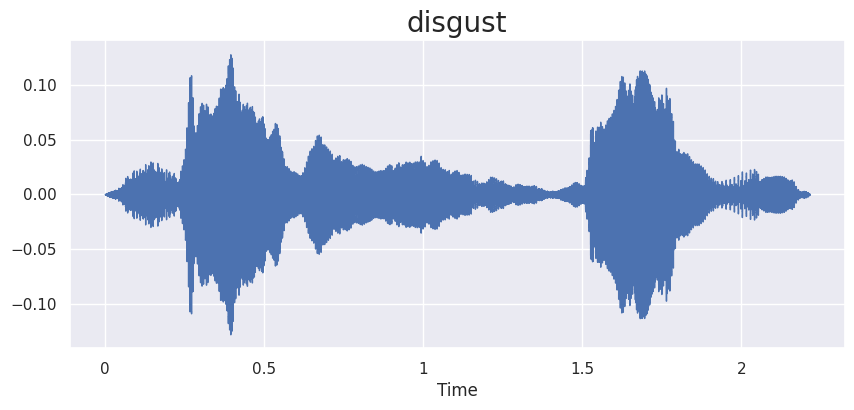

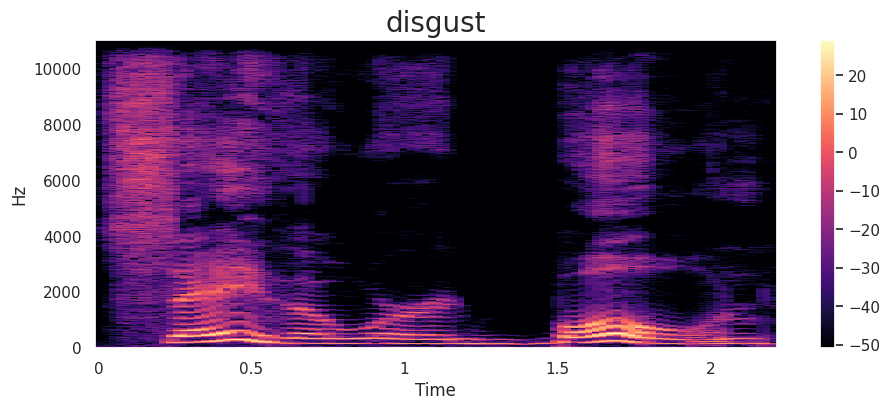

In [ ]:
emotion = 'disgust'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

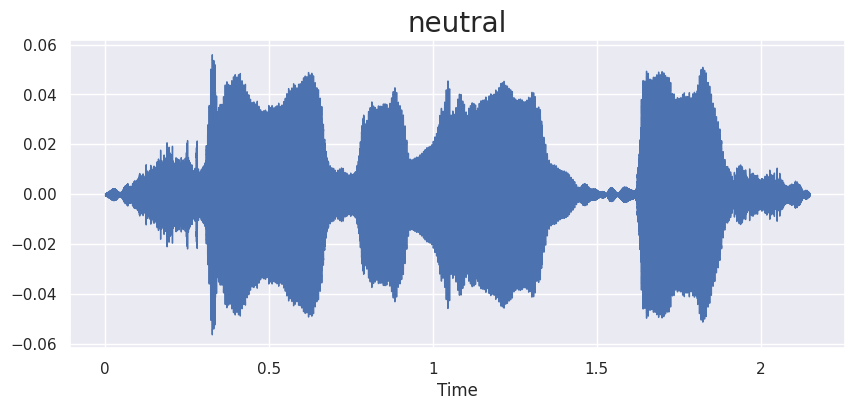

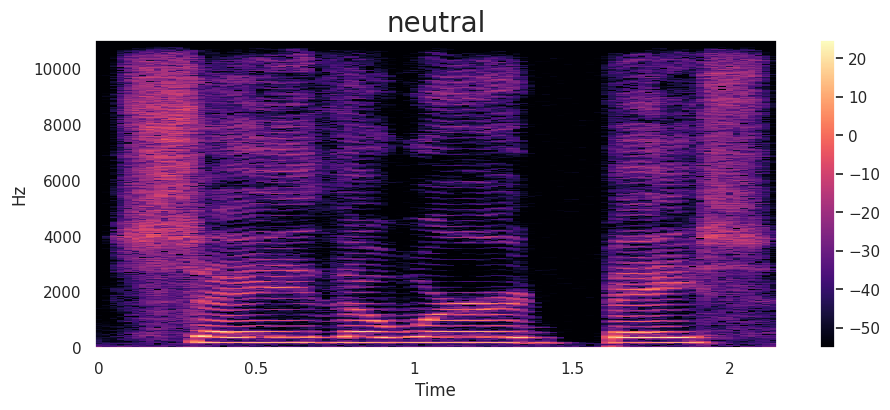

In [ ]:
emotion = 'neutral'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

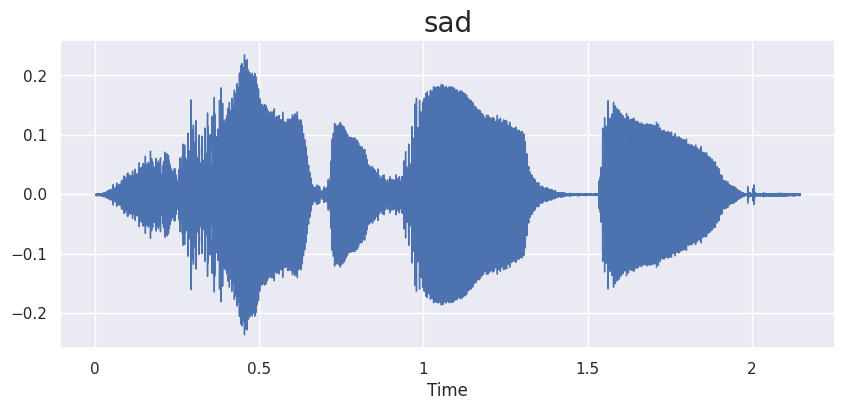

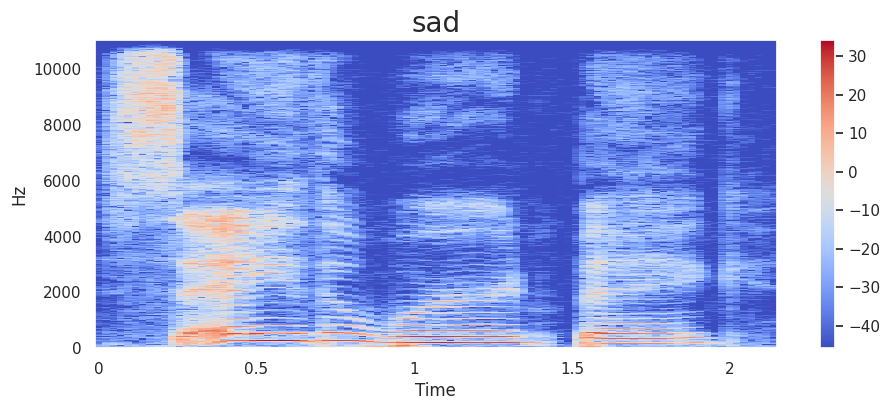

In [ ]:
emotion = 'sad'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

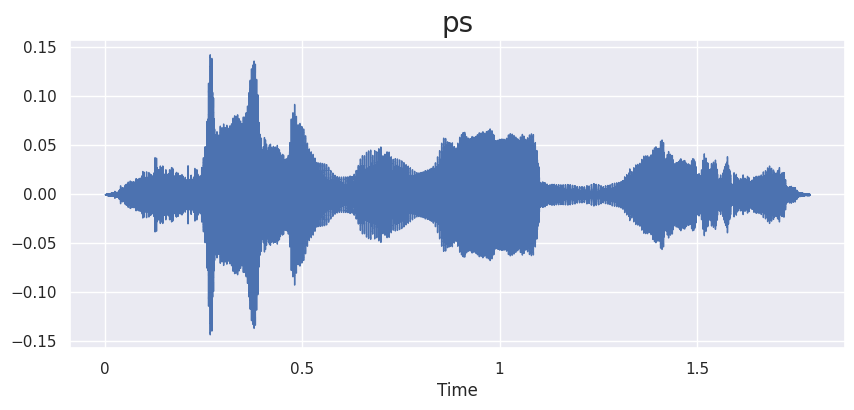

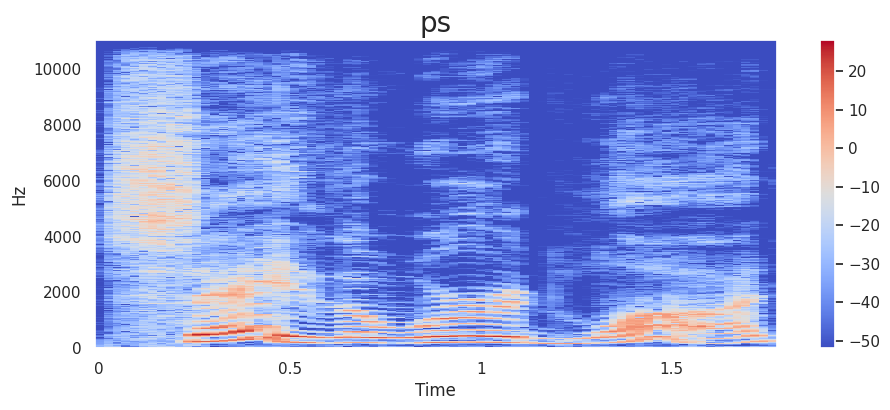

In [ ]:
emotion = 'ps'
path = np.array(df['Speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['Speech'][0])

array([-348.92435   ,   41.963676  ,   -0.6627133 ,   38.14398   ,
         -3.532256  ,   -2.288451  ,   -6.7566504 ,  -16.644173  ,
         -5.4389567 ,  -14.221902  ,   -7.191829  ,    7.0325685 ,
        -16.622805  ,    8.237147  ,   -5.9702363 ,   -5.0578794 ,
         -0.75153285,   -5.0814333 ,  -10.313139  ,   -0.4783119 ,
         -8.027396  ,   -0.6229502 ,    2.663373  ,    8.927801  ,
          7.5849805 ,    8.665425  ,    3.8184707 ,    6.506194  ,
          8.927424  ,   12.752394  ,    6.815676  ,    2.7876954 ,
          0.5742869 ,    6.3207655 ,    8.333877  ,    8.967738  ,
         -2.5091    ,   -5.173132  ,   -4.349491  ,    3.3520627 ],
      dtype=float32)

In [ ]:
X_mfcc = df['Speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-348.92435, 41.963676, -0.6627133, 38.14398, ...
1       [-313.16278, 67.14724, -23.797098, 24.750381, ...
2       [-291.0459, 74.78197, -17.841215, 12.395122, -...
3       [-301.94443, 62.575462, -27.675056, 8.402748, ...
4       [-300.00598, 33.70955, -28.776411, 31.268347, ...
                              ...                        
2795    [-469.7133, 82.33145, -1.4442378, -10.664014, ...
2796    [-466.05695, 72.68218, 6.873391, 4.845342, 9.1...
2797    [-393.85056, 69.498505, -12.267358, -24.066738...
2798    [-440.64124, 68.612465, -9.215987, -26.292242,...
2799    [-405.55737, 81.68523, -4.521557, -28.166002, ...
Name: Speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:

y.shape

(2800, 7)

##Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50
35/35 [==============================] - 0s 13ms/step - loss: 1.8721e-05 - accuracy: 1.0000 - val_loss: 3.5604 - val_accuracy: 0.6857
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 1.2077e-05 - accuracy: 1.0000 - val_loss: 3.5386 - val_accuracy: 0.6857
Epoch 3/50
35/35 [==============================] - 0s 7ms/step - loss: 6.3226e-06 - accuracy: 1.0000 - val_loss: 3.5419 - val_accuracy: 0.6857
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 1.2406e-05 - accuracy: 1.0000 - val_loss: 3.5499 - val_accuracy: 0.6857
Epoch 5/50
35/35 [==============================] - 0s 8ms/step - loss: 1.6406e-05 - accuracy: 1.0000 - val_loss: 3.5606 - val_accuracy: 0.6857
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 1.1678e-05 - accuracy: 1.0000 - val_loss: 3.5627 - val_accuracy: 0.6857
Epoch 7/50
35/35 [==============================] - 0s 8ms/step - loss: 1.1912e-05 - accuracy: 1.0000 - val_loss: 3.5788 - val_accuracy

##Plot The Results

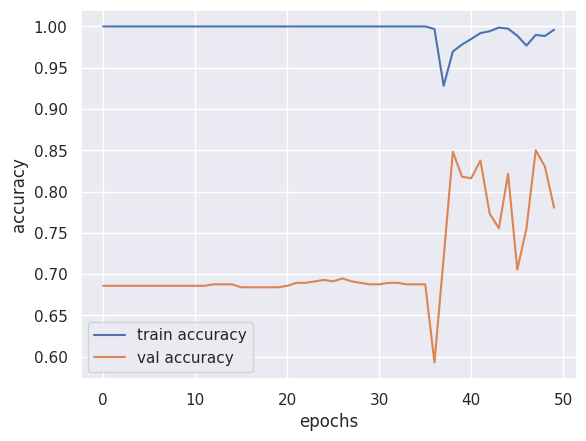

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

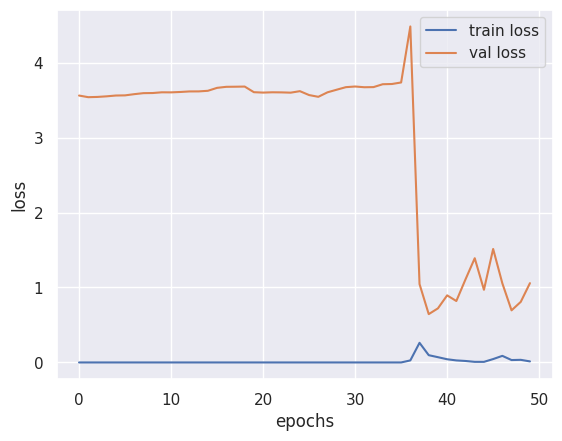

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()